 Q5. Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers. Divide the data set into training and test set. Compare the accuracy of the different classifiers under the following situations:

5.1 a) Training set = 75% Test set = 25% b) Training set = 66.6% (2/3rd of total), Test set = 33.3%

5.2Training set is chosen by i) hold out method ii) Random subsampling iii) Cross-Validation. Compare the accuracy of the classifiers obtained.

5.3Data is scaled to standard format.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import math
import seaborn as sns

# **Working with Breast Cancer dataset**

In [2]:
#importing the data
df=pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.isna().sum().sum()

0

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
x=df.values[:,1:]
y=df.values[:,0]

In [8]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    sns.set(font_scale=1)
    plt.figure(figsize=(10,5))
    labels = [0,1,2]
    # representing A in heatmap format
    cmap1=sns.light_palette("#2ecc71")
    sns.heatmap(C, annot=True, cmap=cmap1, fmt=".0f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

### **Hold Out Method**

In [9]:
def model_evaluations(X_train,y_train,X_test,y_test,ls):
    nb = GaussianNB()
    knn = KNeighborsClassifier(round(math.sqrt(X_train.shape[0])))
    dt = DecisionTreeClassifier()
    nb.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    y_pred = nb.predict(X_test)
    ls.append(accuracy_score(y_test,y_pred)*100)
    print(f"\nmodel: Naive bayes \n\t\tAccuracy:{accuracy_score(y_test,y_pred)*100}")
    print(f"\n\t\tPrecision Score:{precision_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tRecall:{recall_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tF1 Score:{f1_score(y_test,y_pred,average='macro')*100}")
    print('\n===========================================================\n')
    print(classification_report(y_pred,y_test))
    print('\n===========================================================\n')
    plot_confusion_matrix(y_test,y_pred)
    y_pred = knn.predict(X_test)
    ls.append(accuracy_score(y_test,y_pred)*100)
    print(f"\n\nmodel: K-Nearest Neighbors \n\t\tAccuracy:{accuracy_score(y_test,y_pred)}")
    print(f"\n\t\tPrecision Score:{precision_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tRecall:{recall_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tF1 Score:{f1_score(y_test,y_pred,average='macro')*100}")
    print('\n===========================================================\n')
    print(classification_report(y_pred,y_test))
    print('\n===========================================================\n')
    plot_confusion_matrix(y_test,y_pred)
    y_pred = dt.predict(X_test)
    ls.append(accuracy_score(y_test,y_pred)*100)
    print(f"\n\nmodel:Decision Tree \n\t\tAccuracy:{accuracy_score(y_test,y_pred)}")
    print(f"\n\t\tPrecision Score:{precision_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tRecall:{recall_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tF1 Score:{f1_score(y_test,y_pred,average='macro')*100}")
    print('\n============================================================\n')
    print(classification_report(y_pred,y_test))
    print('\n============================================================\n')
    plot_confusion_matrix(y_test,y_pred)

a) Training set = 75% Test set = 25%

accuracy score for models with train set = 0.75 and test set = 0.25 

model: Naive bayes 
		Accuracy:95.8041958041958

		Precision Score:95.53682896379524

		Recall:95.53682896379524

		F1 Score:95.53682896379524


              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        89
         1.0       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143





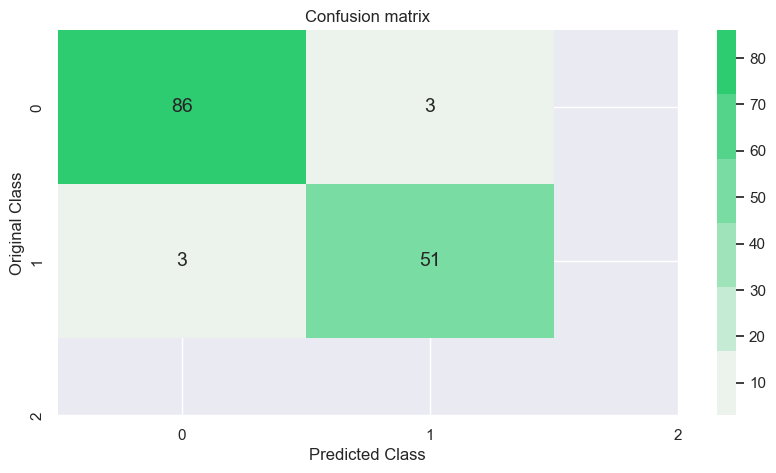



model: K-Nearest Neighbors 
		Accuracy:0.965034965034965

		Precision Score:96.84569479965899

		Recall:95.7344985434873

		F1 Score:96.23783214943435


              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        92
         1.0       0.93      0.98      0.95        51

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143





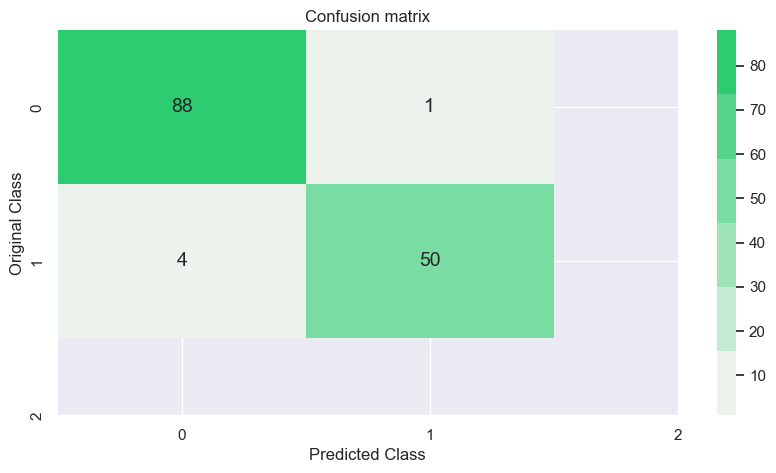



model:Decision Tree 
		Accuracy:0.951048951048951

		Precision Score:94.45124439004488

		Recall:95.3391593841032

		F1 Score:94.84684684684683


              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        86
         1.0       0.96      0.91      0.94        57

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143





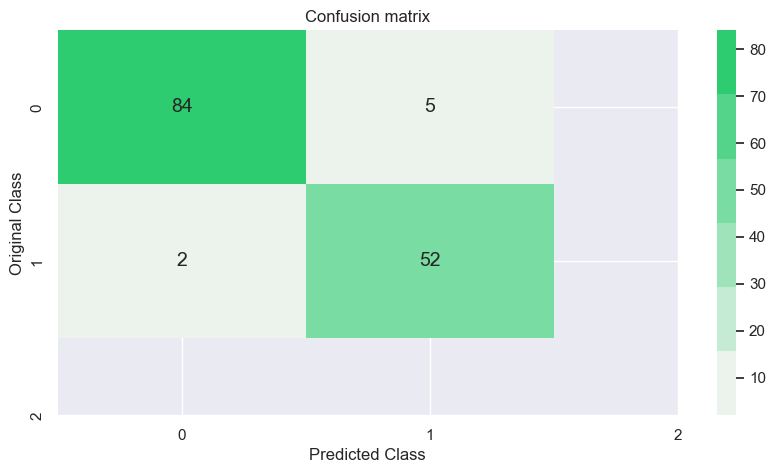

In [10]:
seed = 42
ls1 = []
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=seed)
print("accuracy score for models with train set = 0.75 and test set = 0.25 ")
model_evaluations(X_train, y_train, X_test, y_test,ls1)

b) Training set = 66.6% (2/3rd of total), Test set = 33.3%

accuracy score for models with train set = 0.667 and test set = 0.333 

model: Naive bayes 
		Accuracy:94.14893617021278

		Precision Score:93.75310481867858

		Recall:93.45627235722216

		F1 Score:93.60128716853863


              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       122
         1.0       0.91      0.92      0.92        66

    accuracy                           0.94       188
   macro avg       0.93      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188





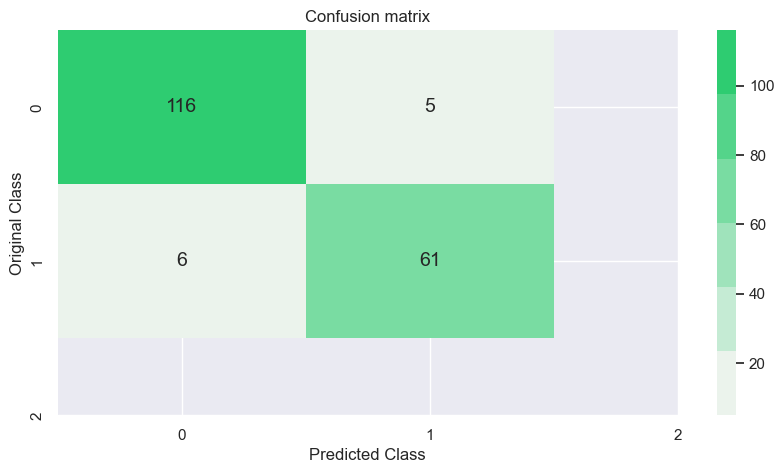



model: K-Nearest Neighbors 
		Accuracy:0.9574468085106383

		Precision Score:96.42442235704142

		Recall:94.36289626248922

		F1 Score:95.26209677419355


              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97       127
         1.0       0.90      0.98      0.94        61

    accuracy                           0.96       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188





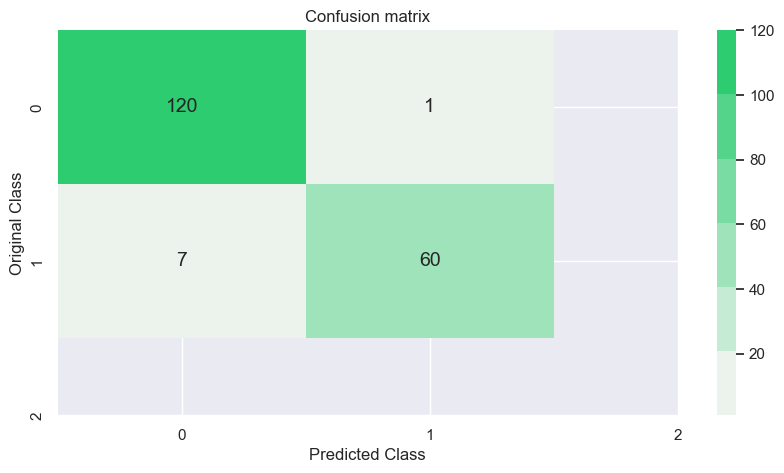



model:Decision Tree 
		Accuracy:0.9042553191489362

		Precision Score:89.12094395280236

		Recall:90.89675588997164

		F1 Score:89.81581798483207


              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       113
         1.0       0.93      0.83      0.87        75

    accuracy                           0.90       188
   macro avg       0.91      0.89      0.90       188
weighted avg       0.91      0.90      0.90       188





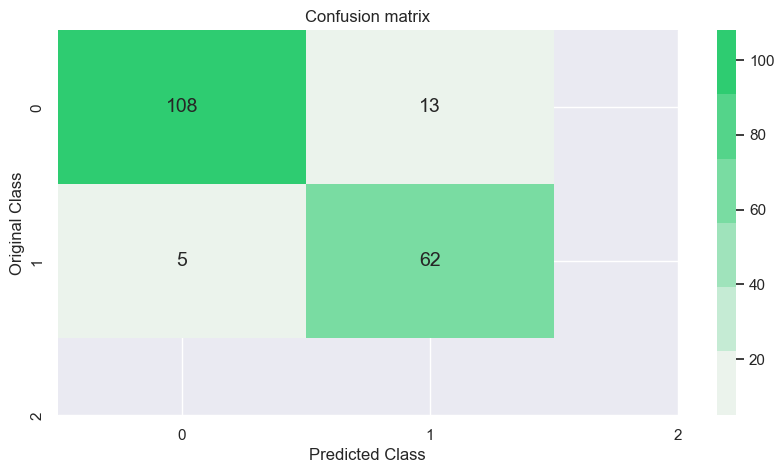

In [11]:
ls2=[]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=seed)
print("accuracy score for models with train set = 0.667 and test set = 0.333 ")
model_evaluations(X_train, y_train, X_test, y_test, ls2)

In [12]:
ls = ['Naive bayes', 'K-Nearest Neighbours','Decision Tree']
dict = {'Accuracy with 75% train and 25% test': ls1, 'Accuracy with 66.6% train and 33.3% test': ls2} 
data = pd.DataFrame(dict,index=ls)
print('Dataframe of accuaracy with different classifiers using hold out method')
data

Dataframe of accuaracy with different classifiers using hold out method


,Accuracy with 75% train and 25% test,Accuracy with 66.6% train and 33.3% test
Naive bayes,95.804196,94.148936
K-Nearest Neighbours,96.503497,95.744681
Decision Tree,95.104895,90.425532


###**Cross-Validation Method**

In [13]:
from sklearn.model_selection import cross_val_score

print('='*35)
print('\nUsing Cross-Validation Method:\n')
print('='*35)
DT = cross_val_score(DecisionTreeClassifier(), x,y )
print("DecisionTree :",DT.mean())

KNN = cross_val_score(KNeighborsClassifier(), x,y )
print("KNeighborsClassifier :",KNN.mean())

NB = cross_val_score(GaussianNB(), x,y)
print("GaussianNB : ",NB.mean())


Using Cross-Validation Method:

DecisionTree : 0.9226362366092221
KNeighborsClassifier : 0.9279459711224964
GaussianNB :  0.9385188635305075


###**Random Subsampling**

In [14]:
rs_results1=list()
rs_results2=list()
rs_results3=list()

In [15]:
def random_subsampling(x_train,y_train,x_test,y_test):
  D=DecisionTreeClassifier()
  nb = GaussianNB()
  knn = KNeighborsClassifier(round(math.sqrt(x_train.shape[0])))
  D.fit(x_train,y_train)
  nb.fit(x_train,y_train)
  knn.fit(x_train,y_train)
  p1=D.predict(x_test)
  p2=nb.predict(x_test)
  p3=knn.predict(x_test)

  rs_results1.append(accuracy_score(y_test,p1))
  rs_results2.append(accuracy_score(y_test,p2))
  rs_results3.append(accuracy_score(y_test,p3))

  print(f"\nmodel: Decision Tree \n\t\tAccuracy:{accuracy_score(y_test,p1)*100}")
  print(f"\n\t\tPrecision Score:{precision_score(y_test,p1,average='macro')*100}")
  print(f"\n\t\tRecall:{recall_score(y_test,p1,average='macro')*100}")
  print(f"\n\t\tF1 Score:{f1_score(y_test,p1,average='macro')*100}")
  print('\n===========================================================\n')
  print('\nConfusion Matrix :')
  print(confusion_matrix(yrs_test,p1))
  print('\n===========================================================\n')
  print(f"\nmodel: Naive bayes \n\t\tAccuracy:{accuracy_score(y_test,p2)*100}")
  print(f"\n\t\tPrecision Score:{precision_score(y_test,p2,average='macro')*100}")
  print(f"\n\t\tRecall:{recall_score(y_test,p2,average='macro')*100}")
  print(f"\n\t\tF1 Score:{f1_score(y_test,p2,average='macro')*100}")
  print('\n===========================================================\n')
  print('\nConfusion Matrix :')
  print(confusion_matrix(yrs_test,p2))
  print('\n===========================================================\n')
  print(f"\nmodel: K-Nearest Neighbours \n\t\tAccuracy:{accuracy_score(y_test,p3)*100}")
  print(f"\n\t\tPrecision Score:{precision_score(y_test,p3,average='macro')*100}")
  print(f"\n\t\tRecall:{recall_score(y_test,p3,average='macro')*100}")
  print(f"\n\t\tF1 Score:{f1_score(y_test,p3,average='macro')*100}")
  print('\n===========================================================\n')
  print('\nConfusion Matrix :')
  print(confusion_matrix(yrs_test,p3))
  print('\n===========================================================\n')

(a) Train size : 75% , test size : 25%

In [16]:
print('\nRandom Subsampling method for train size 75% and test size 25%:\n')

rsna1 = []

for i in range(1,11):
  xrs_train,xrs_test,yrs_train,yrs_test=train_test_split(x,y,test_size=0.25,random_state=i)
  print('For Random state '+str(i)+' : ')
  random_subsampling(xrs_train,yrs_train,xrs_test,yrs_test)

result_ac = np.array(rs_results1)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of Decision Tree = {a} %'.format(a = net_ac*100))
rsna1.append(net_ac*100)
result_ac = np.array(rs_results2)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of Naive Bayes = {a} %'.format(a = net_ac*100))
rsna1.append(net_ac*100)
result_ac = np.array(rs_results3)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of K-Nearest Neighbours = {a} %'.format(a = net_ac*100))
rsna1.append(net_ac*100)


Random Subsampling method for train size 75% and test size 25%:

For Random state 1 : 

model: Decision Tree 
		Accuracy:93.7062937062937

		Precision Score:94.23655913978494

		Recall:92.5

		F1 Score:93.22809786898185



Confusion Matrix :
[[86  2]
 [ 7 48]]



model: Naive bayes 
		Accuracy:94.4055944055944

		Precision Score:94.39203354297693

		Recall:93.75

		F1 Score:94.04910528506034



Confusion Matrix :
[[85  3]
 [ 5 50]]



model: K-Nearest Neighbours 
		Accuracy:91.6083916083916

		Precision Score:92.1515414676509

		Recall:90.11363636363636

		F1 Score:90.93406593406594



Confusion Matrix :
[[85  3]
 [ 9 46]]


For Random state 2 : 

model: Decision Tree 
		Accuracy:93.00699300699301

		Precision Score:92.31381919553962

		Recall:93.61658456486043

		F1 Score:92.7865213882163



Confusion Matrix :
[[79  8]
 [ 2 54]]



model: Naive bayes 
		Accuracy:93.00699300699301

		Precision Score:92.66215106732348

		Recall:92.66215106732348

		F1 Score:92.66215106732348



Confusi

(b) Train size : 66.6% , test size : 33.3%

In [17]:
rs_results1=list()
rs_results2=list()
rs_results3=list()

In [18]:
print('\nRandom Subsampling method for train size 66.6% and test size 33.3%:\n')

rsna2 = []

for i in range(1,11):
  xrs_train,xrs_test,yrs_train,yrs_test=train_test_split(x,y,test_size=0.33,random_state=i)
  print('For Random state '+str(i)+' : ')
  random_subsampling(xrs_train,yrs_train,xrs_test,yrs_test)

result_ac = np.array(rs_results1)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of Decision Tree = {a} %'.format(a = net_ac*100))
rsna2.append(net_ac*100)
result_ac = np.array(rs_results2)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of Naive Bayes = {a} %'.format(a = net_ac*100))
rsna2.append(net_ac*100)
result_ac = np.array(rs_results3)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of K-Nearest Neighbours = {a} %'.format(a = net_ac*100))
rsna2.append(net_ac*100)


Random Subsampling method for train size 66.6% and test size 33.3%:

For Random state 1 : 

model: Decision Tree 
		Accuracy:93.08510638297872

		Precision Score:93.15104166666667

		Recall:91.45090681676048

		F1 Score:92.21035856573707



Confusion Matrix :
[[119   4]
 [  9  56]]



model: Naive bayes 
		Accuracy:94.68085106382979

		Precision Score:94.1213258286429

		Recall:94.1213258286429

		F1 Score:94.1213258286429



Confusion Matrix :
[[118   5]
 [  5  60]]



model: K-Nearest Neighbours 
		Accuracy:91.48936170212765

		Precision Score:91.144959339099

		Recall:89.8686679174484

		F1 Score:90.45079365079364



Confusion Matrix :
[[117   6]
 [ 10  55]]


For Random state 2 : 

model: Decision Tree 
		Accuracy:93.08510638297872

		Precision Score:92.41258741258741

		Recall:93.34723049434187

		F1 Score:92.8064753495217



Confusion Matrix :
[[106   9]
 [  4  69]]



model: Naive bayes 
		Accuracy:93.61702127659575

		Precision Score:93.48742024798362

		Recall:93.031566408576

In [19]:
ls = ['Decision Tree','Naive bayes', 'K-Nearest Neighbours']
dict = {'Accuracy with 75% train and 25% test': rsna1, 'Accuracy with 66.6% train and 33.3% test': rsna2} 
data = pd.DataFrame(dict,index=ls)
print('Dataframe of accuaracy with different classifiers using Random Subsampling method')
data

Dataframe of accuaracy with different classifiers using Random Subsampling method


,Accuracy with 75% train and 25% test,Accuracy with 66.6% train and 33.3% test
Decision Tree,91.678322,93.351064
Naive bayes,94.195804,94.627660
K-Nearest Neighbours,92.657343,93.031915


### **Standardizing the data**

In [20]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
ss = StandardScaler()
X = ss.fit_transform(X)

accuracy score for models with train set = 0.75 and test set = 0.25 and all the data is standardized

model: Naive bayes 
		Accuracy:95.1048951048951

		Precision Score:94.6590909090909

		Recall:94.97503121098627

		F1 Score:94.81158969574457


              precision    recall  f1-score   support

           0       0.96      0.97      0.96        88
           1       0.94      0.93      0.94        55

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143





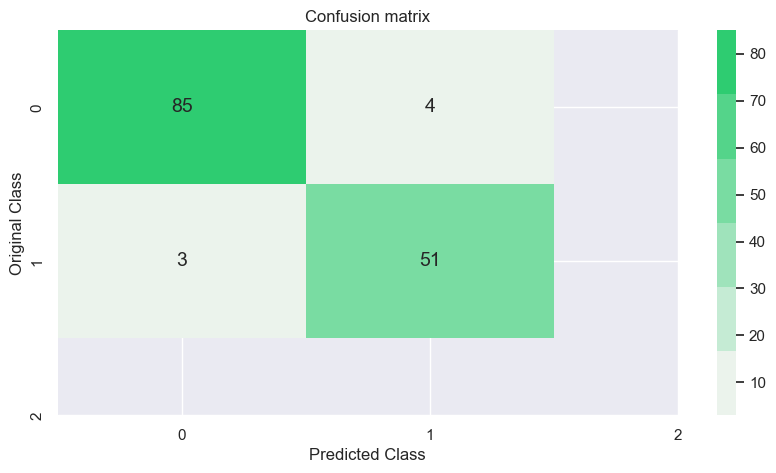



model: K-Nearest Neighbors 
		Accuracy:0.958041958041958

		Precision Score:95.87912087912088

		Recall:95.17270079067832

		F1 Score:95.50314465408805


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        91
           1       0.93      0.96      0.94        52

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143





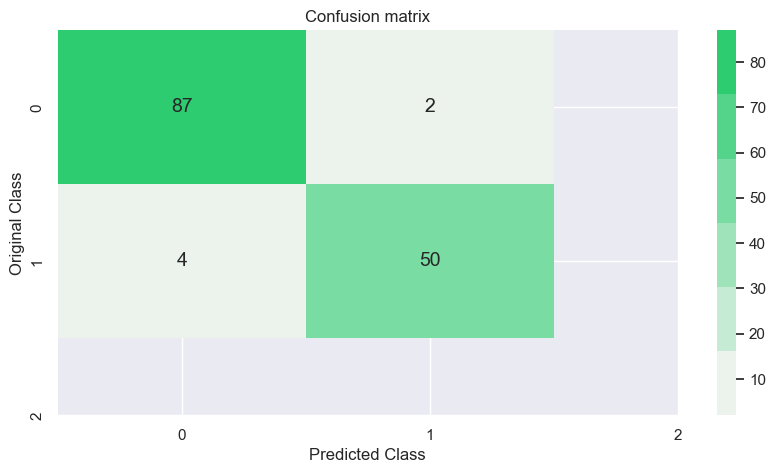



model:Decision Tree 
		Accuracy:0.9440559440559441

		Precision Score:93.8115763546798

		Recall:94.41323345817727

		F1 Score:94.09090909090908


              precision    recall  f1-score   support

           0       0.94      0.97      0.95        87
           1       0.94      0.91      0.93        56

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143





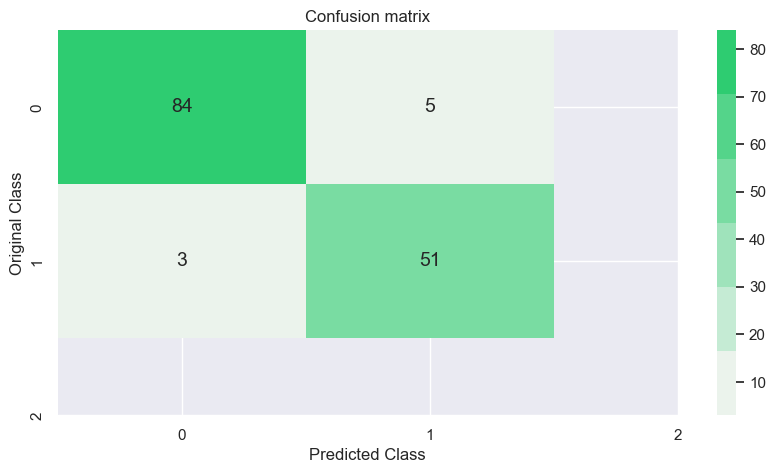

In [22]:
seed = 42
stand_ls1=[]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=seed)
print("accuracy score for models with train set = 0.75 and test set = 0.25 and all the data is standardized")
model_evaluations(X_train, y_train, X_test, y_test, stand_ls1)

In [23]:
ls = ['Naive bayes', 'K-Nearest Neighbours','Decision Tree']
dict = {'Accuracy': stand_ls1} 
data = pd.DataFrame(dict,index=ls)
print('Dataframe of accuaracy with different classifiers after Standarization')
data

Dataframe of accuaracy with different classifiers after Standarization


,Accuracy
Naive bayes,95.104895
K-Nearest Neighbours,95.804196
Decision Tree,94.405594
